In [1]:
library(dplyr)
library(readr)
install.packages("caret")
library(caret)
install.packages("forecast")
library(forecast)
install.packages("glmnet")
library(glmnet)
install.packages("survminer")
library(survminer)
install.packages("survival")
library(survival)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix

Loaded glmnet 4.1-8

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggpubr


Attaching package: ‘ggpubr’


The following object is masked from ‘package:forecast’:

    gghistogram


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: 

In [2]:
# Leer el archivo CSV desde la URL
url <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/maquina2.csv"
df <- read_csv(url, show_col_types = FALSE)
df_copy <- df

In [3]:
summary(df)

   Equipment        Operation           WO Type           Model Base       
 Min.   : 100268   Length:85074       Length:85074       Length:85074      
 1st Qu.:1025826   Class :character   Class :character   Class :character  
 Median :1069897   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1031592                                                           
 3rd Qu.:1123223                                                           
 Max.   :1161230                                                           
 Problem Code       Failure Code        Cause Code        Action Code       
 Length:85074       Length:85074       Length:85074       Length:85074      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
      

In [4]:
head(df,5)

Equipment,Operation,WO Type,Model Base,Problem Code,Failure Code,Cause Code,Action Code,Date,downtimeGross,partsCost,repairHours
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,SEWF001,SEWC012,SEWA013,1/17/2024,3.00,12.50,2.00
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,SEWF001,SEWC017,SEWA013,10/3/2023,1.25,16.81,1.25
100268,BIND LEG,Calibration,VF2500,SEWP001,SEWF001,SEWC001,SEWA001,7/14/2023,0.08,0.74,0.08
100312,BARTACK,Corrective Maintenance,LT2-B872,SEWP001,SEWF001,SEWC005,SEWA005,3/18/2023,0.25,2.67,0.25
100312,SET ZIPPER,Corrective Maintenance,LT2-B872,SEWP001,SEWF008,SEWC082,SEWA083,3/9/2023,0.33,0.00,0.33


In [5]:
# Calcular la frecuencia de cada operación
operation_freq <- df %>%
  group_by(Operation) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
operation_freq <- operation_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))

operation_freq

Operation,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
HEM SLEEVE,14035,14035,0.1649740
HEM BOTTOM,10608,24643,0.2896655
JOIN PANEL,5498,30141,0.3542916
TAPE SHOULDER,3808,33949,0.3990526
HEM AROUND,3564,37513,0.4409455
SET SLEEVE,3270,40783,0.4793827
ATTACH ELASTIC,3093,43876,0.5157392
JOIN SHOULDER,2938,46814,0.5502739
FLAT LOCK,2875,49689,0.5840680


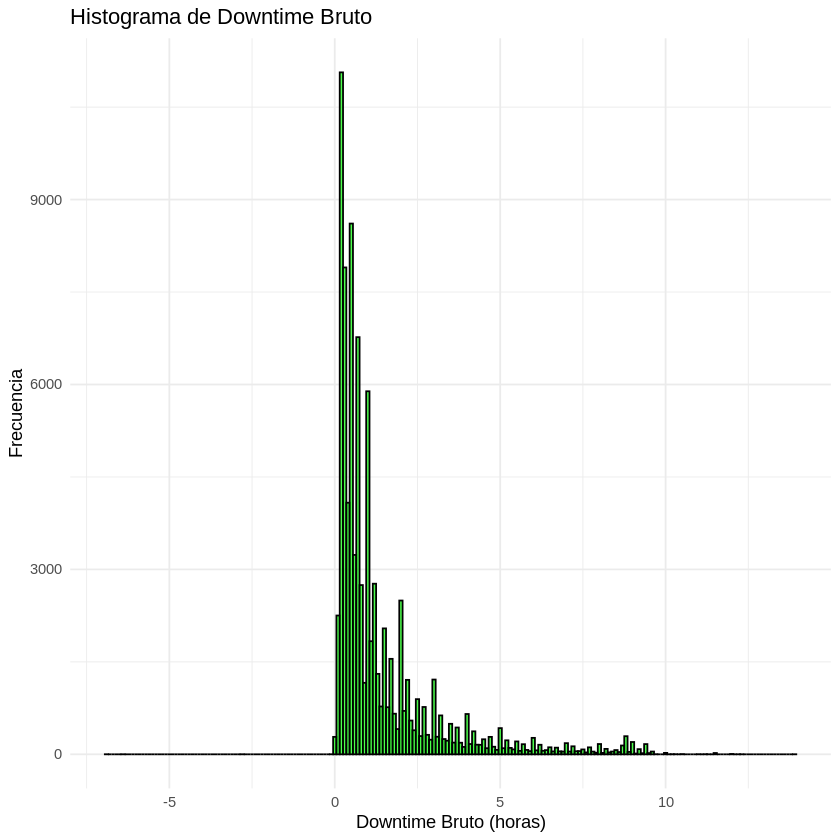

In [6]:
# Histograma de 'downtimeGross'
hist_downtimeGross <- ggplot(df, aes(x = downtimeGross)) +
  geom_histogram(binwidth = 0.1, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Histograma de Downtime Bruto",
       x = "Downtime Bruto (horas)",
       y = "Frecuencia") +
  theme_minimal()

# Mostrar histogramas
print(hist_downtimeGross)

In [7]:
# Filtrar registros donde downtimeGross no sea negativo
df_filtered <- df %>%
  filter(downtimeGross >= 0)

In [8]:
# Convertir la columna 'Date' al formato adecuado
df$Date <- as.Date(df$Date, format="%m/%d/%Y")  # Ajusta el formato según tus datos
# Ordenar el DataFrame por fecha
df <- df %>%
  arrange(Date)

In [9]:
# Calcular la diferencia en días entre la fecha actual y la fecha del último mantenimiento preventivo registrado para cada equipo
df <- df %>%
  group_by(Equipment) %>%
  mutate(Time_Since_Last_Preventive_Maintenance = ifelse(`WO Type` == "Preventative Maintenance", difftime(max(Date), Date, units = "days"), 0))

In [10]:
# Filtrar el DataFrame por 'WO Type' igual a 'Corrective Maintenance'
df <- df %>%
  filter(`WO Type` == "Corrective Maintenance")

In [11]:
# Calcular la diferencia en días entre fechas consecutivas
df <- df %>%
  group_by(Equipment) %>%
  mutate(Days_Between_Failures = difftime(Date, lag(Date), units = "days"))

# Reemplazar los valores NA en Days_Between_Failures
df$Days_Between_Failures[is.na(df$Days_Between_Failures)] <- as.numeric(difftime(df$Date[is.na(df$Days_Between_Failures)], as.Date("2023-01-01"), units = "days"))

In [12]:
df <- df %>%
  group_by(Equipment) %>%
  mutate(Cumulative_Failure_Count = row_number())

In [13]:
# Calcular el promedio de tiempo de reparación
df <- df %>%
  group_by(Equipment) %>%
  mutate(Average_Repair_Time = mean(repairHours, na.rm = TRUE))

In [14]:
# Calcular el costo acumulado de mantenimiento
df <- df %>%
  group_by(Equipment) %>%
  mutate(Cumulative_Maintenance_Cost = cumsum(partsCost))

Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


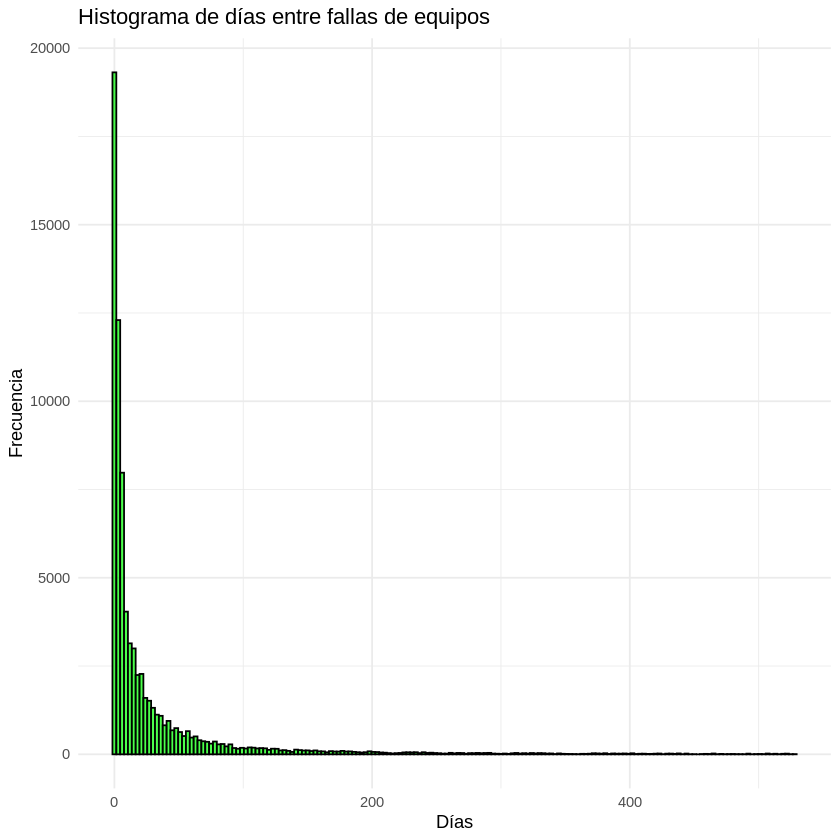

In [15]:
# Histograma de 'Days_Between_Failures'
hist_downtimeGross <- ggplot(df, aes(x = Days_Between_Failures)) +
  geom_histogram(binwidth = 3, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Histograma de días entre fallas de equipos",
       x = "Días",
       y = "Frecuencia") +
  theme_minimal()

# Mostrar histogramas
print(hist_downtimeGross)

**MODELO DE REGRESIÓN LOGÍSTICA**

In [16]:
# Crear una nueva columna llamada 'critically' basada en la condición de 'downtimeGross'
df_copy$critically <- ifelse(df_copy$downtimeGross > 0.5, 0, 1)

In [17]:
head(df_copy,5)

Equipment,Operation,WO Type,Model Base,Problem Code,Failure Code,Cause Code,Action Code,Date,downtimeGross,partsCost,repairHours,critically
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,SEWF001,SEWC012,SEWA013,1/17/2024,3.00,12.50,2.00,0
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,SEWF001,SEWC017,SEWA013,10/3/2023,1.25,16.81,1.25,0
100268,BIND LEG,Calibration,VF2500,SEWP001,SEWF001,SEWC001,SEWA001,7/14/2023,0.08,0.74,0.08,1
100312,BARTACK,Corrective Maintenance,LT2-B872,SEWP001,SEWF001,SEWC005,SEWA005,3/18/2023,0.25,2.67,0.25,1
100312,SET ZIPPER,Corrective Maintenance,LT2-B872,SEWP001,SEWF008,SEWC082,SEWA083,3/9/2023,0.33,0.00,0.33,1


In [18]:
df_copy$critically <- as.factor(df_copy$critically)

In [19]:
# Filtrar el DataFrame por 'WO Type' igual a 'Corrective Maintenance'
df_copy <- df_copy %>%
  filter(`WO Type` == "Corrective Maintenance")
df_filtrado <- dplyr::select(df_copy,-Equipment,-`WO Type`,-Date,-downtimeGross,-repairHours)

In [20]:
head(df_filtrado,5)

Operation,Model Base,Problem Code,Failure Code,Cause Code,Action Code,partsCost,critically
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>
BIND LEG,VF2500,SEWP002,SEWF001,SEWC012,SEWA013,12.50,0
BIND LEG,VF2500,SEWP002,SEWF001,SEWC017,SEWA013,16.81,0
BARTACK,LT2-B872,SEWP001,SEWF001,SEWC005,SEWA005,2.67,1
SET ZIPPER,LT2-B872,SEWP001,SEWF008,SEWC082,SEWA083,0.00,1
SET ZIPPER,LT2-B872,SEWP002,SEWF008,SEWC082,SEWA080,0.00,1


In [ ]:
# Ajustar el modelo de regresión logística
logistic_model <- glm(critically ~ ., data = df_filtrado, family = binomial(link="logit"))

# Resumen del modelo
summary(logistic_model)

**MODELO DE REGRESION LINEAL PARA PREDECIR DAYS BETWEEN FAILURES**

In [ ]:
# Inicializar y ajustar el modelo de regresión lineal
df <- select(df, -`WO Type`)
# Convertir la variable Days_Between_Failures a tipo de datos numérico
df$Days_Between_Failures <- as.numeric(df$Days_Between_Failures)

In [ ]:
head(df,5)

In [ ]:
formula <- as.formula("Days_Between_Failures ~ Equipment + Operation + `Model Base` + `Problem Code` + `Failure Code` +
`Cause Code` + `Action Code` + downtimeGross + partsCost + repairHours + Time_Since_Last_Preventive_Maintenance + Cumulative_Failure_Count + Average_Repair_Time +
Cumulative_Maintenance_Cost")

In [ ]:
# Inicializar y ajustar el modelo de regresión lineal
model <- lm(formula = formula, data = df)
# Resumen del modelo
summary(model)

In [ ]:
# Realizar backward elimination
model_final <- step(model, direction = "backward")
model_final$anova

In [ ]:
formula2 = as.formula("Days_Between_Failures ~  Operation + `Model Base` +
    `Problem Code` + `Action Code` + downtimeGross +
    repairHours + Cumulative_Failure_Count + Average_Repair_Time +
    Cumulative_Maintenance_Cost")

In [ ]:
# Inicializar y ajustar el modelo de regresión lineal
model2 <- lm(formula = formula2, data = df)
# Resumen del modelo
summary(model2)

In [ ]:
# Ordenar los datos por equipo y fecha
df <- df %>% arrange(Equipment, Date)

# Convertir la columna 'Date' en un objeto de fecha
df$Date <- as.Date(df$Date)

# Filtrar las columnas necesarias
df_filtrado <- df %>% select(Equipment, Date, Days_Between_Failures)

# Crear una lista para almacenar los modelos ARIMA para cada equipo
models <- list()

**MODELO DE SERIE TEMPORAL POR EQUIPO PARA PREDECIR DAYS BETWEEN FAILURE**

In [ ]:
# Obtener la lista única de equipos
equipments <- unique(df$Equipment)

# Ajustar un modelo ARIMA para cada equipo
for (equipment in equipments) {
  # Filtrar los datos para el equipo actual
  df_equipment <- df_filtrado %>% filter(Equipment == equipment)

  # Crear la serie temporal
  ts_data <- ts(df_equipment$Days_Between_Failures, frequency = 1)

  # Ajustar el modelo ARIMA
  fit <- auto.arima(ts_data)

  # Almacenar el modelo
  models[[as.character(equipment)]] <- fit
}

In [ ]:
# Encuentra el índice del valor si está presente en el vector
indice_equipo <- which(equipments == 1159763)
indice_equipo

In [ ]:
# Ver el modelo ajustado para un equipo específico (por ejemplo, el primero)
equipment_example <- equipments[5838]
print(models[[as.character(equipment_example)]])

In [ ]:
# Hacer una predicción para el equipo específico
forecast_length <- 5  # Número de periodos a predecir
forecast_result <- forecast(models[[as.character(equipment_example)]], h = forecast_length)
print(forecast_result)

# Graficar el resultado de la predicción
plot(forecast_result)

# Evaluar el rendimiento del modelo para un equipo específico
actuals <- df_filtrado %>% filter(Equipment == equipment_example) %>% pull(Days_Between_Failures)
predictions <- fitted(models[[as.character(equipment_example)]])
mse <- mean((actuals - predictions)^2)
print(paste("MSE:", mse))

**ANALISIS DE SUPERVIVENCIA PARA MAQUINARIA DE RUEDO DE MANGA**

In [ ]:
# Cargar datos
url <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/maquina2.csv"
data <- read_csv(url, show_col_types = FALSE)

In [ ]:
head(data,5)

In [ ]:
# Filtrar el DataFrame por 'WO Type' igual a 'Corrective Maintenance'
data <- data %>%
  filter(`WO Type` == "Corrective Maintenance")
data <- data%>%
  filter(Operation == "HEM SLEEVE")

In [ ]:
# Convertir la columna 'Date' al formato adecuado
data$Date <- as.Date(data$Date, format="%m/%d/%Y")  # Ajusta el formato según tus datos

# Ordenar por equipo y fecha
data <- data %>% arrange(Equipment, Date)

# Calcular el tiempo entre fallas y si la falla ocurrió
data <- data %>%
  group_by(Equipment) %>%
  mutate(Previous_Failure_Date = lag(Date),
         Days_Between_Failures = as.numeric(Date - Previous_Failure_Date),
         Event_Occurred = ifelse(is.na(Previous_Failure_Date), 0, 1)) %>%
  ungroup()

# Eliminar filas con NA en 'Days_Between_Failures'
data <- data %>% filter(!is.na(Days_Between_Failures))

In [ ]:
head(data,5)

In [ ]:
# Convertir las variables categóricas a factores
data$Equipment <- as.factor(data$Equipment)
data$Operation <- as.factor(data$Operation)
data$Model.Base <- as.factor(data$`Model Base`)
data$Problem.Code <- as.factor(data$`Problem Code`)
data$Failure.Code <- as.factor(data$`Failure Code`)
data$Cause.Code <- as.factor(data$`Cause Code`)
data$Action.Code <- as.factor(data$`Action Code`)

In [ ]:
cox_model <- coxph(Surv(Days_Between_Failures, Event_Occurred) ~
                  Model.Base + Problem.Code + Failure.Code + Cause.Code +
                   Action.Code + downtimeGross + partsCost +repairHours, data = data)

In [ ]:
# Resumen del modelo
summary(cox_model)

In [ ]:
# Curvas de supervivencia ajustadas
fit <- survfit(cox_model)
ggsurvplot(fit, data = data, risk.table = TRUE, pval = TRUE,
           title = "Curvas de Supervivencia Ajustadas",
           xlab = "Tiempo (días)", ylab = "Probabilidad de Supervivencia")


In [ ]:
# Imprimir el resumen del ajuste para ver la mediana de supervivencia
summary_fit <- summary(fit)
print(summary_fit)

# Obtener la mediana de supervivencia
median_survival <- summary_fit$time[which.min(abs(summary_fit$surv - 0.5))]
print(paste("La mediana de supervivencia es:", median_survival, "días"))

In [ ]:
library(ggplot2)
library(survminer)

# Graficar la curva de supervivencia con la mediana de supervivencia resaltada
plot <- ggsurvplot(fit, data = data, risk.table = TRUE, pval = TRUE,
                   title = "Curvas de Supervivencia Ajustadas",
                   xlab = "Tiempo (días)", ylab = "Probabilidad de Supervivencia",
                   conf.int = TRUE)

# Añadir línea vertical y anotación para la mediana de supervivencia
plot$plot <- plot$plot +
  geom_vline(xintercept = median_survival, linetype = "dashed", color = "red") +
  annotate("text", x = median_survival, y = 0.5, label = paste("Mediana =", median_survival, "días"), vjust = -1, color = "red")

print(plot)